<a href="https://colab.research.google.com/github/adiegn/Soft-Computing/blob/main/nndl_m08_5200411486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NPM : 5200411486


---


Nama : Adie Gunawan Alwani

In [8]:
import pandas as pd
import numpy as np
import random 
import math
import matplotlib.pyplot as plt

In [9]:
import io 

from google.colab import files
filenya = files.upload()

df = pd.read_csv(io.StringIO(filenya['emailspam.csv'].decode('utf-8')))
print(df)

Saving emailspam.csv to emailspam (1).csv
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0

In [10]:
#baca data csv
#csv_data = pd.read_csv("emailspam.csv", delimeter =';',header= 0)
data = np.array(df) #konversi data csv menjadi array
data = data.astype(float) #konversi data menjadi tipe floar
n_data = len(data[:,0]) #menghitung banyaknya data

print('jumlah data: ', n_data )

#membaca jumlah feature 
n_feature = len(data[0,:]) - 1

print('jumlah feature : ', n_feature )


jumlah data:  4601
jumlah feature :  57


In [11]:
#membagi data : data latih dan data uji
rasio_data_latih = 0.7
n_data_latih = int(n_data * rasio_data_latih)
data_latih = data[:n_data_latih,:]
data_uji = data[n_data_latih:,:]
n_data_uji = len(data_uji[:,0])

print('jumlah data latih', n_data_latih)
print('jumlah data uji ', n_data_uji)

np.seterr(invalid = 'ignore')

#normalisasi data latih dalam rentang[0.1 , 0.9]
for i in range(1, n_feature + 1):
  data_latih[:,i] = 0.1 + ((data_latih[:,i] - min(data_latih[:,i]))/(max(data_latih[:,i])-min(data_latih[:,i]))) * 0.8

print(data_latih)

#normalisasi data uji dalam rentang [0.1 , 0.9]

for i in range (1, n_feature + 1):
  data_uji[:,i] = 0.1 + ((data_uji[:,i] - min(data_uji[:,i]))/(max(data_uji[:,i])-min(data_uji[:,i]))) * 0.8

print(data_uji)

jumlah data latih 3220
jumlah data uji  1381
[[0.         0.13585434 0.20039216 ... 0.10480577 0.1139899  0.9       ]
 [0.21       0.11568627 0.17843137 ... 0.10800961 0.15186869 0.9       ]
 [0.06       0.1        0.21137255 ... 0.13876652 0.2140404  0.9       ]
 ...
 [0.27       0.11512605 0.1        ... 0.10040048 0.10505051 0.1       ]
 [0.         0.1        0.1        ... 0.10088106 0.10181818 0.1       ]
 [0.         0.1        0.23647059 ... 0.10032038 0.10161616 0.1       ]]
[[0.         0.1        0.1        ... 0.2236715  0.13162147        nan]
 [0.         0.1        0.1        ... 0.13091787 0.12608194        nan]
 [0.         0.1        0.1        ... 0.1115942  0.10253895        nan]
 ...
 [0.3        0.1        0.15286344 ... 0.11932367 0.12700519        nan]
 [0.96       0.1        0.1        ... 0.11545894 0.11777265        nan]
 [0.         0.1        0.21453744 ... 0.11545894 0.10900173        nan]]


In [12]:
#iniliasisasi parameter jst 
n_input = n_feature
n_hidden = 1
n_output = 1
n_epoch = 1
alfa = 0

np.random.seed(seed=716)

#iniliasisasi bobot MLP dalam rentang [-1 , 1]
w = np.random.rand(n_hidden,n_input) * 2 - 1
b1 = np.random.rand(n_hidden) * 2 - 1
v = np.random.rand(n_output, n_hidden) # *2 - 1
b2 = np.random.rand(n_output) * 2 - 1

In [13]:
# learning 
itr = 0 
MSE = np.zeros(n_epoch + 1)
while(itr <= n_epoch):
  print("epoch ke - " + str(itr))

  for idx_data in range(0, n_data_latih):
    label = data[idx_data, n_feature]
    feature = data_latih[idx_data,0:n_feature]

    #hitung nilai pada hidden layer
    z = np.zeros(n_hidden)
    for i in range(0,n_hidden):
      net = np.sum(feature * w[i]) + b1[i]
      z[i] = 1/(1 + math.exp(-net))

    #hitung nilai pada output layer 
    y = np.zeros(n_output)
    f_output = np.zeros(n_output)
    for i in range(0,n_output):
      net = np.sum(z * v[i]) + b2[i]
      y[i] = 1/(1 + math.exp(-net))

    #hitung error pada output layer
    error = label - y

    #hitung jumlah error
    sum_squared_error = sum(error**2)

    #hitung faktor koreksi pada output layer
    for i in range(0, n_output): 
      f_output[i]= error * y[i] * (1 - y[i])

    #hitung perbaikan bobot antara output dan hidden layer 
    delta_v = np.zeros(shape=(n_output, n_hidden))
    for i in range(0,n_output):
      delta_v[i,:] = alfa * f_output[i] * z

    #hitung perbaikan bobot BIAS (b2) antara output dan hidden layer
    delta_b2 = np.zeros(n_output) 
    for i in range(0,n_output):
      delta_b2[i]= alfa * f_output[i] * 1

    #hitung faktor koreksi pada hidden layer
    f_hidden = np.zeros(n_hidden)
    for i in range (0, n_hidden):
      #langkah 1 hitung f_hidden_net
      f_hidden_net = sum(f_output * v[:,i]) 
      #langkah 2 hitung f_hidden
      f_hidden[i] = f_hidden_net * z[i] * (1 - z[i])

    #hitung perbaikan bobot antara hidden dan input layer 
    delta_w= np.zeros(shape=(n_hidden, n_input)) 
    for i in range(n_hidden):
      delta_w= alfa * f_hidden[i] * feature

    #hitung perbaikan bobot antara hidden dan input layer 
    delta_b1 = np.zeros(n_hidden) 
    for i in range(n_hidden):
      delta_b1 = alfa * f_hidden[i] * 1

      #update semua bobot
      w = w + delta_w
      b1 = b1 + delta_b1
      v = v + delta_v
      b2 = b2+ delta_b2
    #end for
    #hitung Mean Squared Error (MSE)
  MSE[itr] = sum_squared_error / n_data_latih
  itr += 1
#end while

epoch ke - 0
epoch ke - 1


-----------RESULT-----------
Mean Squared Error: 1.0678948228885314e-05


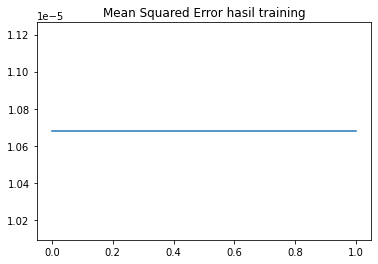

In [14]:
print("-----------RESULT-----------")
print("Mean Squared Error: " +str(MSE [n_epoch]))
#print grafik MSE hasil training
plt.title("Mean Squared Error hasil training")
plt.plot(MSE)
plt.autoscale (enable=True, axis='both', tight=None)
plt.show(block=False)